In [25]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error

## Point estimate

> An **point estimate** is an estimate of **population parameter** computed from **data**.
>
> A point estimate of the parameter $\theta$ is often denoted $\widehat\theta$. 

### Example

> The **sample mean**
>
> $$
\overline X = \frac{X_1+\cdots+X_n}n
$$
>
> is a point estimate of the **population mean**.

### Example

>Two point estimates of the **population variance**, $\sigma^2$, are in common use,
>
>$$
\widehat{\sigma}^2 = \frac1n\sum_{i=1}^n(X_i - \overline X)^2
\qquad\text{and}\qquad
S^2 = \frac1{n-1}\sum_{i=1}^n(X_i - \overline X)^2.
$$

### Remark
> Point estimates depend on the size, $n$, of the random sample used to compute them.
If we need to emphasize this dependence, we'll add a subscript $n$, e.g., $\overline{X}_n$, $\widehat{\sigma}^2_n$, $S^2_n$.

## Finding Point Estimators: Maximum Likelihood

>Let
>$$D=\{X_1,\ldots,X_n\}$$
>
>be an independent set of random variables whose densities depend on a common population parameter, $\theta$:
>
>$$
X_i\sim p_i(x|\theta)
$$

>The **likelihood, $L(\theta|D)$, of $\theta$ given $D$** is the function of $\theta$ defined by
>
>$$
L(\theta|D) = \prod_{i=1}^n p_i(X_i|\theta).
$$

>The **maximum likelihood estimate, $\widehat{\theta}_{\text{ML}}$, of $\theta$**,  associated to $D$ is defined by
>
>$$
\widehat{\theta}_{\text{ML}}
= \operatorname*{argmax}_\theta L(\theta|D).
$$

### Examples (Calculus exercises)

>Suppose $D=\{X_1,\ldots,X_n\}$ is a random sample from the normal distribution $N(\theta)$, where
>
>$$\theta=(\mu,\sigma^2).$$
>
> Then
> $$
\widehat{\theta}_{\text{ML}} = \left(\overline{X},\, \widehat{\sigma}^2\right).
$$

>Suppose $D=\{X_1,\ldots,X_n\}$ is a random sample from the exponential distribution $\operatorname{Exp}(\lambda)$ with density
>
>$$p(x|\lambda) = \begin{cases}\lambda\exp(-\lambda x)&\text{if }x\geq 0,\\
0&\text{if }x<0.\end{cases}
$$
>
> Then
> $$
\widehat{\lambda}_{\text{ML}} = \frac{\;1\;}{\overline{X}}.
$$

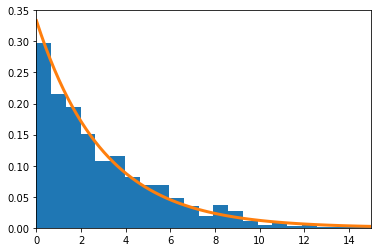

In [20]:
scale = 3 # = 1/lambda
n = 1000

X = np.random.exponential(scale=scale, size=n)
plt.hist(X, bins=30, density=True);
x = np.linspace(0, 20, 100)
plt.plot(x, np.exp(-x/scale)/scale, lw=3)
plt.xlim(0, 15);

>Point estimates $\widehat\theta$ are functions of data. Thus, they have distributions.
Since $\widehat\theta$ is supposed to estimate $\theta$, we might expect
>
>$$
E[\widehat\theta]=\theta.
$$
>
>In general, this is not the case!

### Example
The distribution $\operatorname{Exp}(\lambda)$ has mean $\dfrac1\lambda$. However,

$$
E\big[\widehat{\lambda}_{\text{ML}}\big] = E\left[\frac1{\overline{X}}\right]
\neq \frac1{E\big[\overline{X}\,\big]} = \frac1{E\left[X_1\right]} = \frac1\lambda.
$$

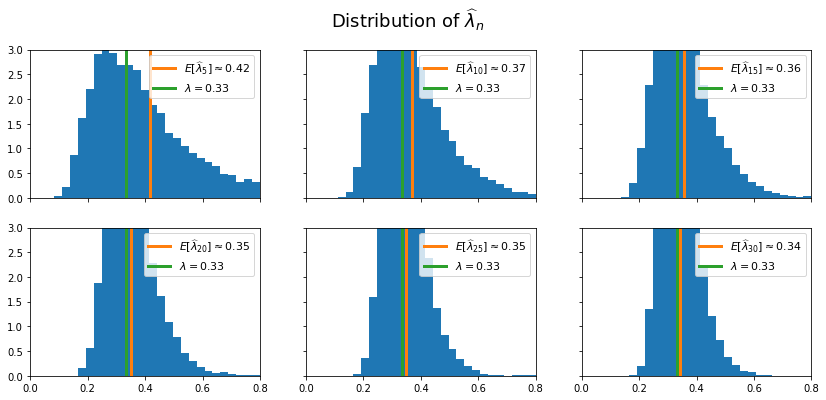

In [103]:
scale = 3 # = 1/lambda
n = 5

def plot(scale, ns, iters, ax):
    estimates = []
    for _ in range(iters):
        X = np.random.exponential(scale=scale, size=n)
        estimate = 1/X.mean()
        estimates.append(estimate)

    lambda_hat = np.mean(estimates)

    ax.hist(estimates, bins=np.linspace(0, 0.8, 30), density=True);
    ax.set_xlim(0, 0.8)
    ax.set_ylim(0, 3)
    ax.plot([lambda_hat, lambda_hat], [0, 3], lw=3, label="$E[\\widehat{\lambda}_{%d}]\\approx$%.2f" % (n, lambda_hat))
    ax.plot([1/scale, 1/scale], [0, 3], lw=3, label="$\\lambda=$%.2f" % (1/scale))
    ax.legend(fontsize=11, loc="upper right")
    
    
fig, [[a0, a1, a2], [a3, a4, a5]] = plt.subplots(2, 3, figsize=(14, 6), sharex=True, sharey=True)
fig.suptitle("Distribution of $\widehat{\lambda}_n$", fontsize=18)
for n, a in zip([5, 10, 15, 20, 25, 30], [a0, a1, a2, a3, a4, a5]):
    plot(scale, n, 10000, a)

## Bias of an Point Estimate

The **bias** of the point estimate $\widehat\theta$ of $\theta$ is defined by

$$\operatorname{Bias}(\widehat\theta, \theta) = E[\widehat\theta] - \theta.$$

A sequence of point estimates $\widehat{\theta}_1,\, \widehat{\theta}_2,\, \widehat{\theta}_3\,\ldots$ computed from random samples of size $1$, $2$, $3$, $\ldots$ is **asymptotically unbiased** if

$$\operatorname{Bias}(\widehat{\theta}_n, \theta)\longrightarrow 0
\qquad\text{as}\qquad
n\longrightarrow \infty.$$

By a theorem of Fisher, maximum likelihood point estimates are asymptotically unbiased.

## The Bias-Variance Decomposition

We have:

$$
\operatorname{Bias}(\widehat\theta,\theta) = E[\widehat\theta - \theta].
$$

To get a more refined perspective on the quality of $\widehat\theta$ as an estimate of $\theta$, we can study investigate other properties of the distribution of $\widehat\theta - \theta$ in addition to its expected value (its first moment). A natural choice is its second moment, the **mean squared error (MSE)** in the estimate $\widehat\theta$ of $\theta$, defined by

$$
\operatorname{MSE}(\widehat\theta,\theta) = E[(\widehat\theta - \theta)^2].
$$

### Theorem (Bias-Variance Decomposition)

$$
\operatorname{MSE}(\widehat\theta,\theta) = \operatorname{Bias}(\widehat\theta,\theta)^2 + \operatorname{Var}\widehat\theta.
$$

### Proof

$$
\begin{aligned}
\operatorname{MSE}(\widehat\theta,\theta) &= E[(\widehat\theta - \theta)^2]\\
&= E\big[\big((\widehat\theta - E[\widehat\theta]) - (\theta - E[\widehat\theta])\big)^2\big]\\
&= \underbrace{E\big[(\widehat\theta - E[\widehat\theta])^2\big]}_{\operatorname{Var}\widehat\theta} -2E\big[(\widehat\theta - E[\widehat\theta])(\theta - E[\widehat\theta])\big]
+ E\big[{\underbrace{(\theta - E[\widehat\theta])}_{\operatorname{Bias}(\widehat\theta,\theta)}}^2\big]
\end{aligned}
$$

Now $\operatorname{Bias}(\widehat\theta,\theta) =\theta - E[\widehat\theta]$ is a number. Therefore, 
$$
\begin{aligned}
E\big[(\widehat\theta - E[\widehat\theta])(\theta - E[\widehat\theta])\big] &=
(\theta - E[\widehat\theta])E[\widehat\theta - E[\widehat\theta]]\\
&= (\theta - E[\widehat\theta])\cdot 0\\
&= 0\\
\text{and}\qquad E\big[(\theta - E[\widehat\theta])^2\big] &= \operatorname{Bias}(\widehat\theta,\theta)^2.
\end{aligned}
$$

The result follows.

### Theorem (Sir Roland Fisher, 1922)
$$
\operatorname{MSE}(\widehat{\theta}_n,\theta)\longrightarrow 0
\qquad\text{as}\qquad
n\longrightarrow \infty
$$


### Example

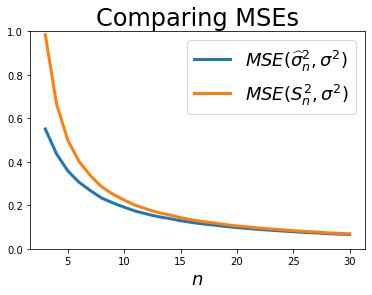

In [183]:
BIAS_MLs = []
BIAS_uns = []
VAR_MLs = []
VAR_uns = []

for i in range(100):
    bias_MLs = []
    bias_uns = []
    var_MLs = []
    var_uns = []
    for n in np.arange(3, 31):
        theta_MLs = []
        theta_uns = []
        
        for j in range(1000):
            X = np.random.normal(0, 1, size=n)
            theta_ML = X.var()
            theta_un = n*theta_ML/(n-1)
            theta_MLs.append(theta_ML)
            theta_uns.append(theta_un)

        bias_ML = np.mean(theta_MLs) - 1
        bias_un = np.mean(theta_uns) - 1
        bias_MLs.append(bias_ML)
        bias_uns.append(bias_un)

        var_ML = np.var(theta_MLs)
        var_un = np.var(theta_uns)
        var_MLs.append(var_ML)
        var_uns.append(var_un)

    BIAS_MLs.append(bias_MLs)
    BIAS_uns.append(bias_uns)
    VAR_MLs.append(var_MLs)
    VAR_uns.append(var_uns)
    
BMLs = np.array(BIAS_MLs)
Buns = np.array(BIAS_uns)
VMLs = np.array(VAR_MLs)
Vuns = np.array(VAR_uns)

plt.plot(np.arange(3, 31), np.mean(BMLs**2 + VMLs, axis=0), lw=3, label="$MSE(\\widehat{\\sigma}^2_n, \\sigma^2)$")
plt.plot(np.arange(3, 31), np.mean(Buns**2 + Vuns, axis=0), lw=3, label="$MSE(S^2_n,\sigma^2)$")
plt.ylim(0, 1);
plt.legend(fontsize=18)
plt.xlabel("$n$", fontsize=18)
plt.title("Comparing MSEs", fontsize=24);

## Bias-Variance Decomposition for Regression

$$
r(x) = \beta_0 + \beta_1 x\qquad\text{(unknown)}
$$

$$
Y_i\sim N(r(x_i),\sigma^2),\qquad i=1,\ldots,n
$$

$$
\widehat r(x) = \widehat{\beta}_0 + \widehat{\beta}_1 x
$$

$\widehat{\beta}_0$ and $\widehat{\beta}_1$ are unbiased point estimates of $\beta_0$ and $\beta_1$, respectively.

$\dfrac{\text{RSS}}{n-2}$ is an unbiased estimator of $\sigma^2$.

Let

$$
Y_0\sim N(r(x_0),\sigma^2)
$$

be a new observation.
View it as a point estimate of $\widehat r(x_0)$.

$$
\operatorname{MSE}(Y_0, \widehat r(x_0)) = E_{Y_0}[(Y_0 - \widehat r(x_0))^2].
$$

$$
\operatorname{MSE}(Y_0, \widehat r(x_0)) = \operatorname{Bias}(Y_0, \widehat r(x_0))^2 + \operatorname{Var} Y_0.
= (r(x_0) - \widehat r(x_0))^2 + \sigma^2
$$


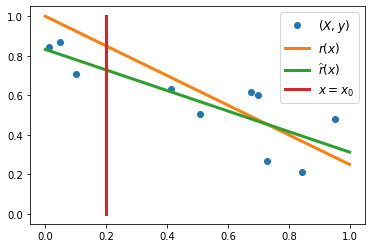

In [226]:
from sklearn.linear_model import LinearRegression

np.random.seed(666)

n = 10
b0 = 1
b1 = -0.75
X = np.random.uniform(size=n)
e = np.random.normal(0, 0.2, size=n)
y = b0 + b1*X + e

plt.plot(X, y, 'o', label="$(X,y)$")
plt.plot([0, 1], [b0, b0 + b1], lw=3, label="$r(x)$")


M = LinearRegression()
M.fit(X.reshape(-1, 1), y)
b0hat = M.intercept_
b1hat = M.coef_[0]
plt.plot([0, 1], [b0hat, b0hat + b1hat], lw=3, label="$\\widehat{r}(x)$")

x0 = 0.2
plt.plot([x0, x0], [0, 1], lw=3, label="$x=x_0$")
plt.legend(fontsize=12)

In [221]:
y0 = np.random.normal(b0 + b1*x0, 0.2, size=1000)

In [222]:
mse = np.mean(np.square(y0 - (b0hat + b1hat*x0)))
bias = (b0 + b1*x0 - b0hat - b1hat*x0)
var = np.var(y0)
print(mse)
print(bias**2 + var)

0.0547174205413275
0.055462351193862405


In [223]:
bias**2

0.014818809790323444

In [224]:
var

0.040643541403538964

In [1]:
from sklearn.neighbors import KNeighborsRegressor

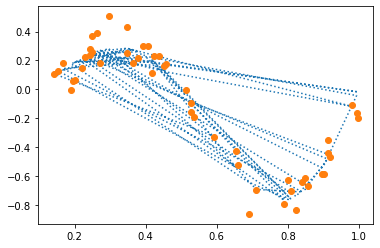

In [37]:
n = 50
X = np.random.uniform(size = n)
r = X*np.sin(2*np.pi*X)
plt.plot(X, r, ':')

y = r + np.random.normal(0, 0.1, size = n)
plt.plot(X, y, 'o')

In [21]:
M = KNeighborsRegressor(n_neighbors=10)
M.fit(X.reshape(-1, 1), y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                    weights='uniform')

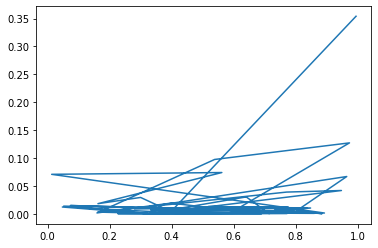

In [30]:
X_te = np.linspace(0, 1)
plt.plot(X_te, M.predict(X_te.reshape(-1, 1)), lw=3)
plt.plot(X_te, X_te*np.sin(2*np.pi*X_te))
plt.plot(X, y, 'o')

mse_tr = mean_squared_error(y, M.predict(X.reshape(-1,1)))
e_tr = (y - M.predict(X.reshape(-1,1)))**2
plt.plot(X, e_tr)